### ADVANCED DATA SCIENCE PROJECT - SENTIMENT ANALYSIS OF ROMAN URDU TEXT

<h5>Background</h5>
Sentiment analysis is part of natural language processing that aims to determine the sentiments of a text, mostly as positive or negative. Most sentiment analysis is based on languages with rich resources like English. However, there is a gap when it comes to Roman urdu which is very popular and widely used on social media platforms by people of India and Paksitan. A well developed model will allow us to understand users' sentiments towards products, services or events providing audience insights which may be used to build systems like a recommendation system.

<h5>Objective</h5>
To delve deeper insights into text data written in Roman urdu, this project will take a previously tagged open dataset and use it to train a sentiment analysis model using machine learning and deep learning algorithms.

<h5>Data Source</h5>
Open Dataset. It contains roman urdu text from reviews of various e-commerce website, comments of public facebook pages, and twitter accounts. It is tagged for positive, negative and neutral comments. Link : https://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set

### 1. INITIAL DATA EXPLORATION

#### Import libraries for Initial data exploration

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [167]:
#READ DATA INTO PANDAS DATAFRAME
df=pd.read_csv("Roman Urdu DataSet.csv", names=["Comments", "Sentiment","Extra"])
df.head()

,Comments,Sentiment,Extra
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive,NaN
1,sahi bt h,Positive,NaN
2,"Kya bt hai,",Positive,NaN
3,Wah je wah,Positive,NaN
4,Are wha kaya bat hai,Positive,NaN


### Identify quality issues (e.g. missing values, wrong measurements), assess feature quality and value distribution of data - We use simple metrics to understand distribution of data and identify any discrepancies.

In [168]:
#INITIAL LENGTH OF DATA
len(df)

20229

In [169]:
#UNIQUE VALUES IN SENTIMENT COLUMN
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Neative'], dtype=object)

In [170]:
#UNIQUE VALUES IN EXTRA COLUMN 
df['Extra'].unique()

array([nan, '----------------', '----------', '-------', '------', '9090',
       'till here'], dtype=object)

#### Based on the above results, we need to make two data cleaning efforts:

1) There seems to be spelling mistake with the sentiment "Neative". Lets see how frequent is this mistake. We can decide to either delete it or keep it. We find that there is no Nan value in this column.

2) The last column seem to contain no useful information. Hence we will delete it.

In [171]:
df['Sentiment'].value_counts()

Neutral     8929
Positive    6013
Negative    5286
Neative        1
Name: Sentiment, dtype: int64

<AxesSubplot:>

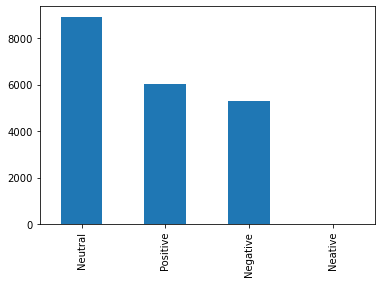

In [172]:
#Visualizing distribution of sentiment class through a bar chart
df['Sentiment'].value_counts().plot(kind='bar')

### 2. DATA CLEANSING - REMOVING DUPLICATES, NAN VALUES AND ERRORSOME DATA

In [173]:
uniquesentences=set(df['Comments'])

In [174]:
len(uniquesentences)

19665

##This means the data has duplicate sentences. Let's remove the duplicates and any nan values.

In [175]:
df = df.drop_duplicates(subset='Comments')
len(df)

19665

In [176]:
## Lets delete the last column extra, any Neative sentence and nan values
df=df.drop(columns=['Extra'])
df.head()

,Comments,Sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [177]:
#DROP NAN
df=df.dropna()
df.head()
len(df)

19664

In [178]:
#REMOVE ROW WITH SPELLING ERROR
df = df[df.Sentiment != 'Neative']
len(df)

19663

In [179]:
df=df.reset_index()
df.tail()

,index,Comments,Sentiment
19658,20224,Hamari jese awam teli laga k mazay leti,Negative
19659,20225,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative
19660,20226,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative
19661,20227,aanti toh gussa e kr gai hain,Negative
19662,20228,mai b sirf shadi kanry ki waja say imran khan ...,Positive


In [180]:
df=df.drop(columns=['index'])
df.tail()

,Comments,Sentiment
19658,Hamari jese awam teli laga k mazay leti,Negative
19659,Kaash hum b parhay likhay hotayKabhi likhtay g...,Negative
19660,Bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,Negative
19661,aanti toh gussa e kr gai hain,Negative
19662,mai b sirf shadi kanry ki waja say imran khan ...,Positive


#### After some initial data cleansing, we have 19663 rows of data - comments and respective sentiments (positive, negative, neutral).
### 3. PREPROCESSING for FEATURE CREATION

#### Given we have textual data which is based on natural language, we will import nltk libary to remove some stop words. 

In [51]:
pip install nltk

     |████████████████████████████████| 1.4MB 6.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 307kB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 665kB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 6.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [107]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer

<h3>Stop word removal</h3> - A list of stop word is usually available for many languages but since roman urdu is not well researched, based on prior knowledge, we will consider all single letters as stop words since these do not carry sentiment meaning. We also use a stopword list found on github. https://github.com/haseebelahi/roman-urdu-stopwords/blob/master/stopwords.txt

#### REMOVING SINGLE LETTERs and symbols, punctuations

In [181]:
corpus=[]
for i in range(0,19663):
    review = re.sub('[^a-zA-Z]',' ',df.iloc[:,0].values[i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if len(word)>1] ##REMOVING SINGLE LETTERS
    review=' '.join(review)
    corpus.append(review)

#### REMOVING STOP WORDS BASED ON LIST AVAILABLE ON GITHUB

In [182]:
newcorpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(0,19663):
    review = corpus[i]
    review=review.split()
    review=[word for word in review if not word in stopwords]
    review=' '.join(review)
    newcorpus.append(review)

<h3> Comparing results. If you compare the sentence with and without stop word removal, we can see that we have successfully removed all single letter words, symbols, punctuations and other stop words.

In [183]:
#Before removal
df.iloc[283,0]

'bht shukria rna m apni dil diyan gallan kisko sunato😅'

In [184]:
#After removal
newcorpus[283]

'bht shukria rna apni dil diyan gallan kisko sunato'

<h4> MORE CLEANING - Some rows may have empty strings given we have removed some words.

In [185]:
len(newcorpus[newcorpus == '']) #Some rows may have empty strings given we have removed some words.

75

<h5> 75 rows identified with empty strings.

The Sentiment column is a categorical column with three categories, Positive, Negative and Neutral. Lets encode it as a numerical.

In [186]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [187]:
sentimentencoded=df.iloc[:,1].values
label_sentiment=LabelEncoder()
sentimentencoded=label_sentiment.fit_transform(sentimentencoded)
# 0 is negative, 1 is neutral and 2 is positive

In [188]:
#MMERGING THE COMMENTS CORPUS WITH ENCODEDE SENTIMENTS

from pandas import DataFrame

dfnew1 = DataFrame (newcorpus,columns=['Comments_Corpus'])
dfnew2 = DataFrame (sentimentencoded,columns=['Sentiment_Encoded'])
dfnew1= dfnew1.join(dfnew2)
dfnew1['Sentiment']=df['Sentiment']
dfnew1.head()

,Comments_Corpus,Sentiment_Encoded,Sentiment
0,sai kha her kisi kay bus bat nhi lakin hal kal...,2,Positive
1,sahi bt,2,Positive
2,bt,2,Positive
3,wah je wah,2,Positive
4,are wha kaya bat,2,Positive


<h4> REMOVING EMPTY STRINGS DATA 

In [189]:
dfnew1['Comments_Corpus'].replace('', np.nan, inplace=True)

In [190]:
dfnew1=dfnew1.dropna()
dfnew1.tail()
len(dfnew1)

19517

In [191]:
dfnew1=dfnew1.reset_index()
dfnew1.tail()

,index,Comments_Corpus,Sentiment_Encoded,Sentiment
19512,19658,hamari jese awam teli laga mazay leti,0,Negative
19513,19659,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative
19514,19660,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative
19515,19661,aanti toh gussa,0,Negative
19516,19662,mai sirf shadi kanry waja say imran khan sat dey,2,Positive


In [192]:
dfnew1=dfnew1.drop(columns=['index'])

#### SAVING THE CLEAN DATA TO A CSV FILE FOR ANALYSIS

In [193]:
dfnew1.tail()

,Comments_Corpus,Sentiment_Encoded,Sentiment
19512,hamari jese awam teli laga mazay leti,0,Negative
19513,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative
19514,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative
19515,aanti toh gussa,0,Negative
19516,mai sirf shadi kanry waja say imran khan sat dey,2,Positive


In [194]:
dfnew1.to_csv('CleanData.csv')   #SAVING THE CLEAN DATA TO A CSV FILE

### 4. Tokenizing - transforming the data to create feature Vectors based on the corpus above using Scikit-learn's CountVectorizer.
This is a type of one hot encoding where each record will have ones for words (divided into multiple columns) they contain and zeros for words that they do not contain.

In [195]:
from sklearn.feature_extraction.text import CountVectorizer

In [196]:
#dfnew1=pd.read_csv('CleanData.csv')

In [197]:
newcorpus=dfnew1['Comments_Corpus']

In [198]:
cv=CountVectorizer(max_features=250, ngram_range=(1,2))
commentsasvectors=cv.fit_transform(newcorpus).toarray()

In [199]:
commentsasvectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<h3> We have succesfully performed ETL. Extracted the data, tranformed the data into feature vectors and loaded for training use.

In [206]:
# 10000th comment
newcorpus[10000]

'namoona word bolungi unhe ek ghoori deni mujhe fouran waise aunty thanks bolin'

In [207]:
 # number of words in 10000th comment
np.sum(commentsasvectors[10000])

5

### 5. MODEL 1 - MACHINE LEARNING MODEL

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

##### DEFINING INDEPENDENT VARIABLES (COMMENTS) AND DEPENDENT VARIABLES (SENTIMENT)

In [210]:
x=commentsasvectors
y=dfnew1['Sentiment_Encoded']

### TRAIN TEST SPLIT DATA 

In [231]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=4)

### MACHINE LEARNING CLASSIFIERS - MULTI CLASS LOGISTIC REGRESSION

In [232]:
LR=LogisticRegression(C=0.01,solver='liblinear',multi_class='auto')
LR.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [233]:
y_pred=LR.predict(x_test)

In [234]:
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.5332991803278688 


An accuracy score of 53.3% is not very good.

Confusion Matrix
[[ 184  790   94]
 [  43 1523  133]
 [  66  696  375]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


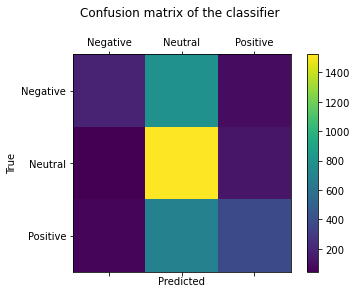

In [60]:
#CONFUSION MATRIX
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Negative','Neutral','Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 5.2 MACHINE LEARNING CLASSIFIERS - LOGISTIC REGRESSION - USING ONLY POSITVE AND NEGATIVE SENTIMENTS

#### SLICED DATA WITH JUST POLAR SENTIMENTS - POSITIVE AND NEGATIVE

In [235]:
dfwithoutneutral=dfnew1[dfnew1.Sentiment != 'Neutral']
len(dfwithoutneutral)

11091

In [236]:
dfwithoutneutral.tail()

,Comments_Corpus,Sentiment_Encoded,Sentiment
19512,hamari jese awam teli laga mazay leti,0,Negative
19513,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative
19514,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative
19515,aanti toh gussa,0,Negative
19516,mai sirf shadi kanry waja say imran khan sat dey,2,Positive


In [237]:
dfwithoutneutral.reset_index(inplace=True)
dfwithoutneutral=dfwithoutneutral.drop(columns=['index'])
dfwithoutneutral.tail()

,Comments_Corpus,Sentiment_Encoded,Sentiment
11086,hamari jese awam teli laga mazay leti,0,Negative
11087,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative
11088,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative
11089,aanti toh gussa,0,Negative
11090,mai sirf shadi kanry waja say imran khan sat dey,2,Positive


#### ENCODING IT AGAIN TO JUST HAVE 0 AND 1 IN A NEW COLUMN MARKED AS Sentiment_Encoded2

In [238]:
sentimentencoded2=dfwithoutneutral.iloc[:,2].values
label_sentiment2=LabelEncoder()
sentimentencoded2=label_sentiment2.fit_transform(sentimentencoded2)
# 0 is negative , 1 is positive

In [239]:
sentimentencoded2[0]

1

In [240]:
dfwithoutneutral['Sentiment_Encoded_new']=sentimentencoded2

In [241]:
dfwithoutneutral.tail()

,Comments_Corpus,Sentiment_Encoded,Sentiment,Sentiment_Encoded_new
11086,hamari jese awam teli laga mazay leti,0,Negative,0
11087,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative,0
11088,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative,0
11089,aanti toh gussa,0,Negative,0
11090,mai sirf shadi kanry waja say imran khan sat dey,2,Positive,1


##### SAVING DATA WITHOUT NEUTRAL COMMENTS

In [242]:
dfwithoutneutral.to_csv('Cleandatawithoutneutral.csv')

In [5]:
#dfwithoutneutral=pd.read_csv('Cleandatawithoutneutral.csv')

### TOKENIZING

In [243]:
#TOKENIZING
newcorpus=dfwithoutneutral['Comments_Corpus']
cv=CountVectorizer(max_features=1000, ngram_range=(1,2))
commentsasvectors=cv.fit_transform(newcorpus).toarray()
x=commentsasvectors
y=dfwithoutneutral['Sentiment_Encoded_new']

### TRAIN TEST SPLIT

In [244]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, stratify=y, random_state=42)

### LOGICTIC REGRESSION MODEL

In [245]:

LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))

Accuracy is 0.7169896349707076 


We find that if we only include positive and negative sentiments to train our model, the accuracy improves to 71.7%, which is not that great but much better than previous model.

### MODEL EVALUATION : The accuracy score for the model with only positive and negative sentiments is higher (71.7%) than when neutral comments are included (only 53%). THe confusion matrix represents the true vs predicted values. We can see that it does give a reasonable amount of accuracy.

Confusion Matrix
[[769 267]
 [361 822]]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


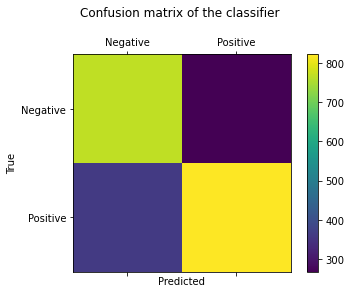

In [254]:
#CONFUSION MATRIX
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
labels=['Negative','Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 6. MODEL 2 - DEEP LEARNING - KERAS SEQUENTIAL MODEL
We will now use a deep learning model to train our data.

In [255]:
import numpy as np
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Input
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [256]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

In [257]:
dfnew1=pd.read_csv('CleanData.csv', encoding='utf-8')

#### Reiterating some data preprocessing 
Removing very long comments.

In [258]:
dfnew1['total_words'] = dfnew1['Comments_Corpus'].str.count(' ') + 1
dfnew1.head()

,Unnamed: 0,Comments_Corpus,Sentiment_Encoded,Sentiment,total_words
0,0,sai kha her kisi kay bus bat nhi lakin hal kal...,2,Positive,19
1,1,sahi bt,2,Positive,2
2,2,bt,2,Positive,1
3,3,wah je wah,2,Positive,3
4,4,are wha kaya bat,2,Positive,4


In [259]:
max(dfnew1.total_words)

235

In [260]:
dfnew1['total_words'].value_counts()

4      1854
3      1778
5      1775
6      1629
2      1366
       ... 
134       1
102       1
86        1
133       1
103       1
Name: total_words, Length: 103, dtype: int64

<h4> Few sentences are really very long and we will remove these for a better uniform analysis. We will use a cut off of 25 words per sentence

In [261]:
dfnew1 = dfnew1[dfnew1.total_words < 25]
len(dfnew1)

18229

In [262]:
dfnew1.reset_index(inplace=True)

In [264]:
dfnew1=dfnew1.drop(columns=['index'])
dfnew1.tail()

,Comments_Corpus,Sentiment_Encoded,Sentiment,total_words
18224,hamari jese awam teli laga mazay leti,0,Negative,7
18225,kaash parhay likhay hotaykabhi likhtay gulbada...,0,Negative,8
18226,bahi sayasat kufrrr ha saaaf bttttt ha qanon s...,0,Negative,18
18227,aanti toh gussa,0,Negative,3
18228,mai sirf shadi kanry waja say imran khan sat dey,2,Positive,10


<h3> Since sentimentclass is multiclass, we will onehot encode it using get_dummies command in pandas. This will results in three columns, each for category negative, neutral and positive.

In [265]:
newcorpus=dfnew1['Comments_Corpus']
sentimentclass=dfnew1['Sentiment_Encoded']
Y=pd.get_dummies(sentimentclass)

<h3> TEST TRAIN SPLIT - We will stratitfy because the number of samples for each sentiment class is uneven (neutral is highest)

In [266]:
#x_train,x_test,y_train,y_test=train_test_split(newcorpus,sentimentclass,test_size=0.20, random_state=4)

In [267]:
x_train,x_test,y_train,y_test=train_test_split(newcorpus,Y,test_size=0.20, stratify=sentimentclass, random_state=42)

<h3> TOKENIZING - USING KERAS TOKENIZER

In [268]:
tokenizer_obj=Tokenizer()
total_comments = newcorpus
tokenizer_obj.fit_on_texts(total_comments)

<h3> PADDING

In [269]:
#pad_sequences
max_length= max([len(s.split()) for s in total_comments])

#vocabulary size
vocab_size=len(tokenizer_obj.word_index) + 1

In [270]:
vocab_size

26853

In [271]:
max_length

24

In [272]:
x_train_tokens=tokenizer_obj.texts_to_sequences(x_train)
x_test_tokens=tokenizer_obj.texts_to_sequences(x_test)

x_train_pad=pad_sequences(x_train_tokens, maxlen=max_length, padding='post')
x_test_pad=pad_sequences(x_test_tokens, maxlen=max_length, padding='post')

### SEQUENTIAL MODEL - for multiclass output, we use softmax activation, categorical crossentroy for loss, and rmsprop as an optimizer.

In [274]:
EMBEDDING_DIM=100

model=Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax')) # we will have three outputs
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [275]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 24, 100)           2685300   
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 2,698,167
Trainable params: 2,698,167
Non-trainable params: 0
_________________________________________________________________
None


In [278]:
model.fit(x_train_pad,y_train, epochs=5, batch_size=32, validation_data=(x_test_pad,y_test), verbose=2)

Train on 14583 samples, validate on 3646 samples
Epoch 1/5
 - 239s - loss: 0.2948 - acc: 0.8995 - val_loss: 1.0558 - val_acc: 0.6306
Epoch 2/5
 - 236s - loss: 0.2682 - acc: 0.9093 - val_loss: 1.0686 - val_acc: 0.6234
Epoch 3/5
 - 229s - loss: 0.2477 - acc: 0.9168 - val_loss: 1.1320 - val_acc: 0.6251
Epoch 4/5
 - 238s - loss: 0.2273 - acc: 0.9248 - val_loss: 1.1801 - val_acc: 0.6267
Epoch 5/5
 - 233s - loss: 0.2095 - acc: 0.9296 - val_loss: 1.1566 - val_acc: 0.6264


We are able to get an accuracy around 62%, which is not that great and does not improve much.

### 6.2 USING DEEP LEARNING on just positive and negative comments. The data is unevenly distributed with neutral comments dominating the dataset. However, data for positive and negative sentiment is comparable size. We expect the model to perform better on this.

In [3]:
dfwithoutneutral=pd.read_csv('Cleandatawithoutneutral.csv', encoding='utf-8')

In [4]:
dfwithoutneutral['total_words'] = dfwithoutneutral['Comments_Corpus'].str.count(' ') + 1
dfwithoutneutral.head()

,Unnamed: 0,Comments_Corpus,Sentiment_Encoded,Sentiment,Sentiment_Encoded_new,total_words
0,0,sai kha her kisi kay bus bat nhi lakin hal kal...,2,Positive,1,19
1,1,sahi bt,2,Positive,1,2
2,2,bt,2,Positive,1,1
3,3,wah je wah,2,Positive,1,3
4,4,are wha kaya bat,2,Positive,1,4


In [5]:
dfwithoutneutral = dfwithoutneutral[dfwithoutneutral.total_words < 25]
len(dfwithoutneutral)

10104

In [6]:
dfwithoutneutral.reset_index(inplace=True)

<h4> We dont need to one hot encode sentiment_encoded_new as it is already binary.

In [7]:
newcorpus=dfwithoutneutral['Comments_Corpus']
sentimentclass=dfwithoutneutral['Sentiment_Encoded_new']

In [31]:
#we will stratitfy because...
x_train,x_test,y_train,y_test=train_test_split(newcorpus,sentimentclass,test_size=0.20, stratify=sentimentclass, random_state=42)

In [32]:
tokenizer_obj=Tokenizer()
total_comments = newcorpus
tokenizer_obj.fit_on_texts(total_comments)

#pad_sequences
max_length= max([len(s.split()) for s in total_comments])

#vocabulary size
vocab_size=len(tokenizer_obj.word_index) + 1

vocab_size

20089

In [33]:
x_train_tokens=tokenizer_obj.texts_to_sequences(x_train)
x_test_tokens=tokenizer_obj.texts_to_sequences(x_test)

x_train_pad=pad_sequences(x_train_tokens, maxlen=max_length, padding='post')
x_test_pad=pad_sequences(x_test_tokens, maxlen=max_length, padding='post')

<h4> SEQUENTIAL MODEL - WE USE SIGMOID ACTIVATION, BINARY_CROSSENTROPY FOR LOSS AND ADAM OPTIMIZER SINCE IT IS A BINARY OUTPUT.

In [34]:
EMBEDDING_DIM=100

model=Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#my_callbacks = [
    #tf.keras.callbacks.EarlyStopping(patience=2),
#]

In [36]:
model.fit(x_train_pad,y_train, epochs=5, validation_data=(x_test_pad,y_test), verbose=2, callbacks=my_callbacks)

Train on 8083 samples, validate on 2021 samples
Epoch 1/5
 - 153s - loss: 0.6902 - acc: 0.5270 - val_loss: 0.6507 - val_acc: 0.5656
Epoch 2/5
 - 151s - loss: 0.5031 - acc: 0.7735 - val_loss: 0.4702 - val_acc: 0.7778
Epoch 3/5
 - 139s - loss: 0.2385 - acc: 0.9195 - val_loss: 0.5416 - val_acc: 0.7640
Epoch 4/5
 - 146s - loss: 0.1182 - acc: 0.9650 - val_loss: 0.6447 - val_acc: 0.7674
Epoch 5/5
 - 152s - loss: 0.0550 - acc: 0.9848 - val_loss: 0.9080 - val_acc: 0.7585


<h2> 7. MODEL EVALUATION AND SELECTION:

<h4> The accuracy scores of all the models are as follows:
    
    LOGISTIC REGRESSION MULTI-CLASS - 53%
    LOGISTIC REGRESSION BINARY - 71.7%
    KERAS SEQUENTIAL MULTICLASS - 62%
    KERAS SEQUENTIAL BINARY - 75.8%

    The best performance is that of binary keras sequential model with an accuracy score of almost 76%. Lets test this with new data.

<h2> 8. TESTING MODEL

We have achieved an accuracy of 76%. Let's test the model with sample negative and positive comments.

In [47]:
test_sample1='kya pagal insan ho, jao yahan se' #negative
test_sample2='mujhe ye bht pasand hai' #positive
test_sample3='mujhe ye bura lagraha hai'#negative
test_sample4='mei khush hon' #positive
test_sample5='mei bht dukhi hon' #negative

samples=[test_sample1,test_sample2,test_sample3,test_sample4,test_sample5]
samples_tokens=tokenizer_obj.texts_to_sequences(samples)
samples_tokenspad=pad_sequences(samples_tokens, max_length)

In [48]:
model.predict(x=samples_tokenspad)   #a value close to zero is negative, a value close to one is positive

array([[0.02842337],
       [0.70118   ],
       [0.38772053],
       [0.799471  ],
       [0.62193364]], dtype=float32)

### We find that the model performs well on the first four samples but incorrect for the 5th sample.